In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [3]:
!pip install "qiskit[visualization]" --no-build-isolation


  Using cached rustworkx-0.17.1-cp39-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
  Using cached stevedore-5.5.0-py3-none-any.whl.metadata (2.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 110.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=24b64782eab845836e886422bdb67dcc2322ca0573f7269778fb534c89afa2c9
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [4]:
!pip install qiskit-aer --no-build-isolation


--- Hadamard on Both Qubits ---


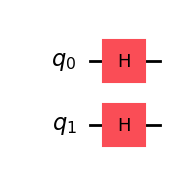

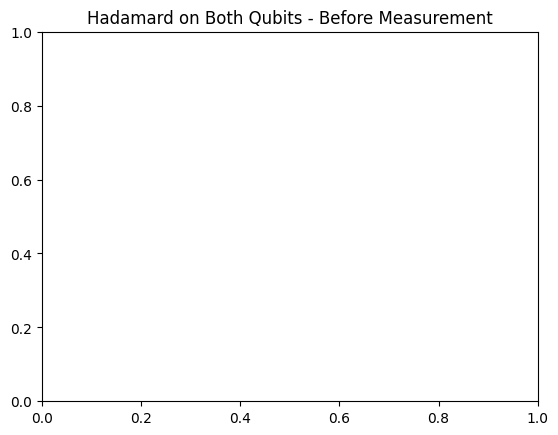

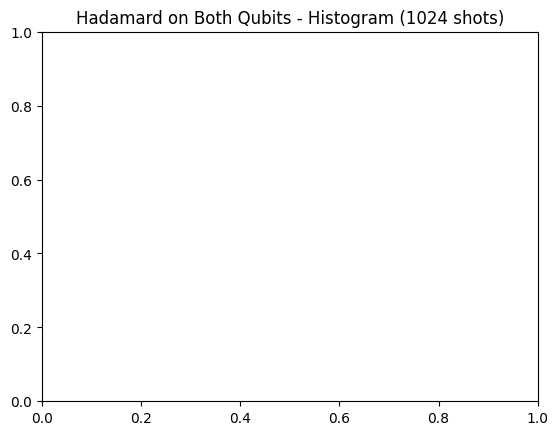

--- X Gate on Second Qubit ---


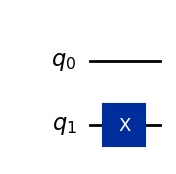

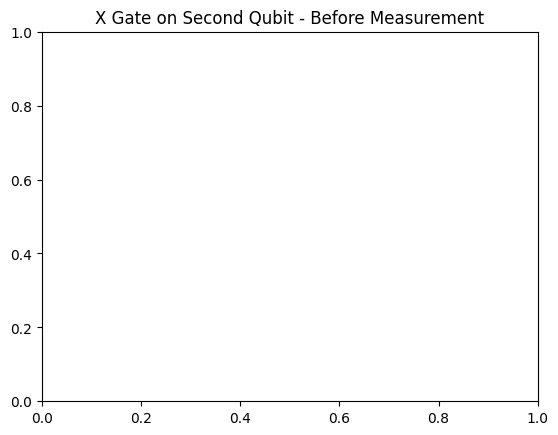

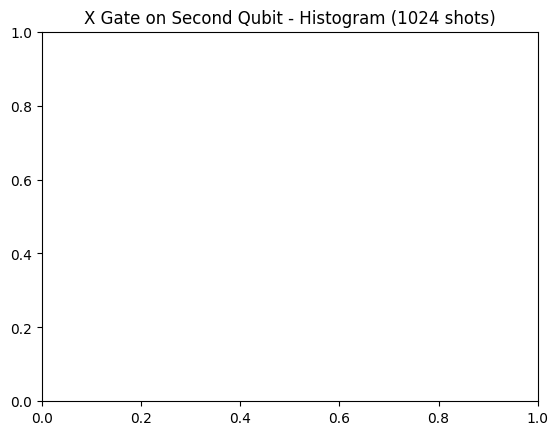

--- Bell State |Φ+⟩ Entanglement ---


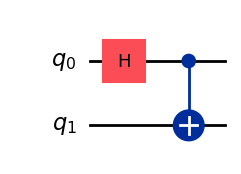

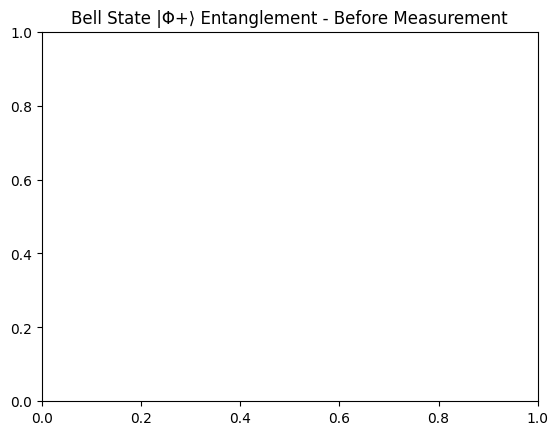

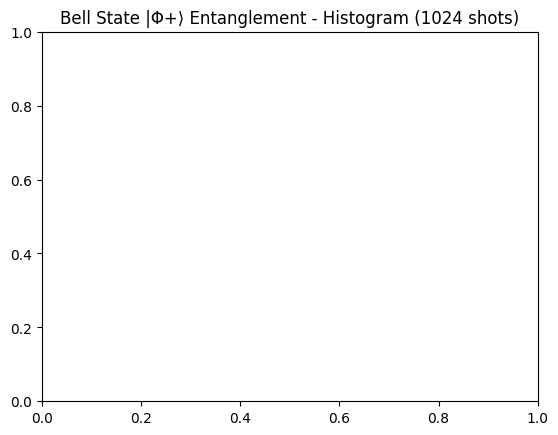

--- Uniform Superposition - More Shots ---


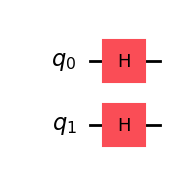

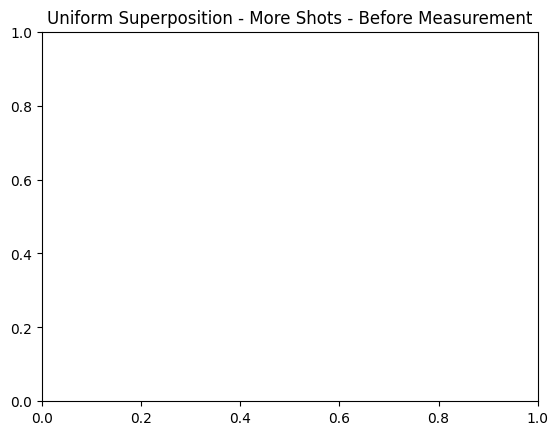

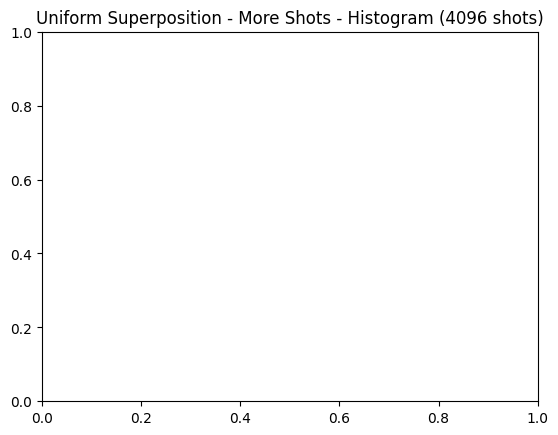

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

def run_and_plot(qc, title="", shots=1024):
    print(f"--- {title} ---")
    display(qc.draw("mpl"))

    # Bloch vector before measurement
    sv = Statevector.from_instruction(qc)
    plot_bloch_multivector(sv)
    plt.title(title + " - Before Measurement")
    plt.show()

    qc_m = qc.copy()
    qc_m.measure_all()

    sim = Aer.get_backend("qasm_simulator")
    result = sim.run(qc_m, shots=shots).result()
    counts = result.get_counts()

    plot_histogram(counts)
    plt.title(title + f" - Histogram ({shots} shots)")
    plt.show()


# 1️⃣ Hadamard on both qubits
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.h(1)
run_and_plot(qc1, "Hadamard on Both Qubits")

# 2️⃣ X on second qubit
qc2 = QuantumCircuit(2)
qc2.x(1)
run_and_plot(qc2, "X Gate on Second Qubit")

# 3️⃣ Entanglement: H + CNOT
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.cx(0, 1)
run_and_plot(qc3, "Bell State |Φ+⟩ Entanglement")

# 4️⃣ More Shots (Stability Test)
qc4 = QuantumCircuit(2)
qc4.h(0)
qc4.h(1)
run_and_plot(qc4, "Uniform Superposition - More Shots", shots=4096)
